### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from IPython.display import display
pd.plotting.register_matplotlib_converters()
from pandas.plotting import register_matplotlib_converters

### Read dataset

In [2]:
df1 = pd.read_csv("./df1.csv")
df2 = pd.read_csv("./df2.csv")
attrition = pd.read_csv("./attrition.csv")

### Data preprocessing

In [3]:
indexes_df2 =  df2.loc[pd.isna(df2.Attrition) == True, "EmployeeNumber"]
indexes_attrition = attrition.loc[pd.isna(attrition.Attrition) == True, "EmployeeNumber"]

In [4]:
df2.dropna(inplace=True)
df1 = df1[df1["EmployeeNumber"].isin(indexes_df2) == False]

In [5]:
#Drop columns that are constant or irrelevant.

In [6]:
df1.drop(['EmployeeCount'], axis=1, inplace=True)
df2.drop(['Over18', 'StandardHours'], axis=1, inplace=True)

##### Examine columns

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4302 entries, 0 to 4448
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeNumber           4302 non-null   int64  
 1   Age                      4302 non-null   float64
 2   BusinessTravel           4302 non-null   object 
 3   DailyRate                4302 non-null   float64
 4   Department               4302 non-null   object 
 5   DistanceFromHome         4302 non-null   float64
 6   Education                4302 non-null   float64
 7   EducationField           4302 non-null   object 
 8   EnvironmentSatisfaction  4302 non-null   float64
 9   Gender                   4302 non-null   object 
 10  HourlyRate               4302 non-null   float64
 11  JobInvolvement           4302 non-null   float64
 12  JobLevel                 4302 non-null   float64
 13  JobRole                  4302 non-null   object 
 14  JobSatisfaction         

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4302 entries, 0 to 4448
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4302 non-null   int64  
 1   OverTime                  4302 non-null   object 
 2   PercentSalaryHike         4302 non-null   float64
 3   PerformanceRating         4302 non-null   float64
 4   RelationshipSatisfaction  4302 non-null   float64
 5   StockOptionLevel          4302 non-null   float64
 6   TotalWorkingYears         4302 non-null   float64
 7   TrainingTimesLastYear     4302 non-null   float64
 8   WorkLifeBalance           4302 non-null   float64
 9   YearsAtCompany            4302 non-null   float64
 10  YearsInCurrentRole        4302 non-null   float64
 11  YearsSinceLastPromotion   4302 non-null   float64
 12  YearsWithCurrManager      4302 non-null   float64
 13  Attrition                 4302 non-null   object 
 14  YearlyIn

In [9]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeNumber,4302.0,4809.243143,2643.040205,1.0,1680.25,5828.5,6903.75,7979.0
Age,4302.0,429.123199,1591.153416,18.0,31.00,36.0,45.00,9890.0
DailyRate,4302.0,800.843794,405.655763,102.0,457.00,804.0,1162.00,1499.0
DistanceFromHome,4302.0,34478.313343,147682.315767,1.0,2.00,8.0,17.00,999590.0
Education,4302.0,2.906788,1.026460,1.0,2.00,3.0,4.00,5.0
EnvironmentSatisfaction,4302.0,2.719665,1.092333,1.0,2.00,3.0,4.00,4.0
HourlyRate,4302.0,66.036495,20.298352,30.0,48.00,66.0,84.00,100.0
JobInvolvement,4302.0,2.741516,0.711379,1.0,2.00,3.0,3.00,4.0
JobLevel,4302.0,2.051604,1.102569,1.0,1.00,2.0,3.00,5.0
JobSatisfaction,4302.0,2.722920,1.106692,1.0,2.00,3.0,4.00,4.0


In [10]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeNumber,4302.0,4809.243143,2643.040205,1.0,1680.25,5828.5,6903.75,7979.0
PercentSalaryHike,4302.0,15.164110,3.624112,11.0,12.00,14.0,18.00,25.0
PerformanceRating,4302.0,3.146444,0.353591,3.0,3.00,3.0,3.00,4.0
RelationshipSatisfaction,4302.0,2.725709,1.079747,1.0,2.00,3.0,4.00,4.0
StockOptionLevel,4302.0,0.787773,0.849147,0.0,0.00,1.0,1.00,3.0
TotalWorkingYears,4302.0,354.004649,1508.016854,0.0,6.00,10.0,17.00,9939.0
TrainingTimesLastYear,4302.0,2.803347,1.302586,0.0,2.00,3.0,3.00,6.0
WorkLifeBalance,4302.0,2.765923,0.708878,1.0,2.00,3.0,3.00,4.0
YearsAtCompany,4302.0,312.854719,1373.999529,0.0,3.00,5.0,10.00,9984.0
YearsInCurrentRole,4302.0,367.109484,1480.107024,0.0,2.00,3.0,7.00,9937.0


### Heatmap

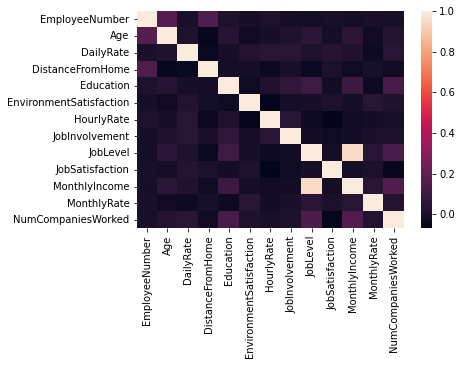

In [11]:
corr = df1.corr()

sns.heatmap(corr)

In [12]:
# From this correlation graph we can observe that is a high correlation between Job level and Monthly income.

### Outliers

In [13]:
# Lets plot the outliers in order to see if we have to delete some data that can affect our model 

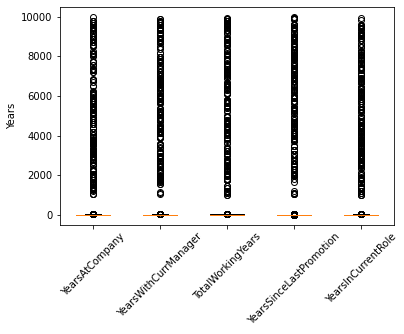

In [14]:
fig, ax = plt.subplots()
ax.boxplot([df2["YearsAtCompany"],
            df2["YearsWithCurrManager"],
            df2["TotalWorkingYears"],
            df2["YearsSinceLastPromotion"],
            df2["YearsInCurrentRole"]])
ax.set_xticklabels(["YearsAtCompany", "YearsWithCurrManager", "TotalWorkingYears", 
                    "YearsSinceLastPromotion", "YearsInCurrentRole"], rotation = 45)
ax.set_ylabel("Years")

plt.show()

In [15]:
# In df2 I observed that columns "YearsAtCompany", "YearsWithCurrManager", "TotalWorkingYears", "YearsSinceLastPromotion",
# "YearsInCurrentRole" have many outliers with huge values.
# Probably that values were registered with another measure unit so I droped that entries.

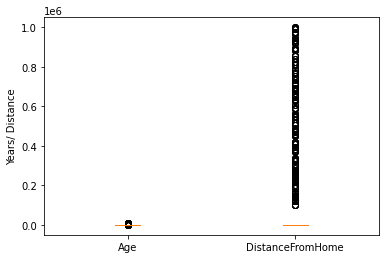

In [16]:
fig, ax = plt.subplots()
ax.boxplot([df1["Age"],
            df1["DistanceFromHome"]])
ax.set_xticklabels(["Age", "DistanceFromHome"])
ax.set_ylabel("Years/ Distance")

plt.show()

In [17]:
# In df1 I observed that columns "Age" and "DistanceFromHome" have many outliers with huge values.
# Probably that values were registered with another measure unit so I droped that entries.

##### Drop the outliers

In [18]:
df2 = df2[df2["YearsAtCompany"] < 60]
df2 = df2[df2['YearsWithCurrManager'] <= 17]
df2 = df2[df2['TotalWorkingYears'] <= 40]
df2 = df2[df2['YearsSinceLastPromotion'] <= 40]
df2 = df2[df2['YearsInCurrentRole'] <= 40]
df1 = df1[df1["Age"] <= 60]
df1 = df1[df1["DistanceFromHome"] <= 100]

In [19]:
# Lets plot the outliers after I deleted the huge values

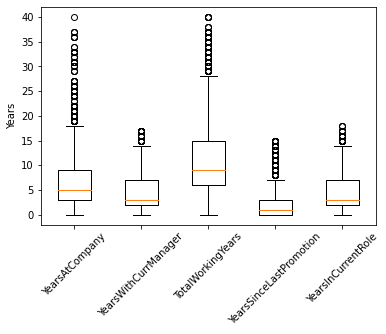

In [20]:
fig, ax = plt.subplots()
ax.boxplot([df2["YearsAtCompany"],
            df2["YearsWithCurrManager"],
            df2["TotalWorkingYears"],
            df2["YearsSinceLastPromotion"],
            df2["YearsInCurrentRole"]])
ax.set_xticklabels(["YearsAtCompany", "YearsWithCurrManager", "TotalWorkingYears", 
                    "YearsSinceLastPromotion", "YearsInCurrentRole"], rotation = 45)
ax.set_ylabel("Years")

plt.show()

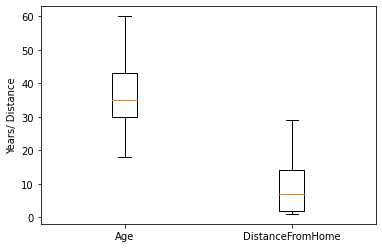

In [21]:
fig, ax = plt.subplots()
ax.boxplot([df1["Age"],
            df1["DistanceFromHome"]])
ax.set_xticklabels(["Age", "DistanceFromHome"])
ax.set_ylabel("Years/ Distance")

plt.show()

### Categorical columns

In [22]:
# df1['Department'] = df1['Department'].replace({
#     'Research & Development': 0, 
#     'Human Resources': 1, 
#     'Sales': 2 })

# df1['BusinessTravel'] = df1['BusinessTravel'].replace({
#     'Non-Travel': 0, 
#     'Travel_Rarely': 1, 
#     'Travel_Frequently': 2 })

# df1['EducationField'] = df1['EducationField'].replace({
#     'Life Sciences': 0, 
#     'Human Resources': 1,
#     'Marketing': 2,
#     'Medical': 3,
#     'Technical Degree': 4,
#     'Other': 5 })

# df1['Gender'] = df1['Gender'].apply(lambda x: 1 if x == 'Female' else 0) 

# df1['MaritalStatus'] = df1['MaritalStatus'].replace({
#     'Divorced': 0, 
#     'Single': 1, 
#     'Married': 2 })


df2['Attrition'] = df2['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

df2['OverTime'] = df2['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0) 

In [23]:
# df1['JobRole'] = df1['JobRole'].astype('category').cat.codes

In [24]:
attrition['Attrition'] = attrition['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0) 

##### Keeping the same indexes for both dataframes df1 and df2

In [25]:
indexes_df1 =  df1["EmployeeNumber"]
df2 = df2[df2["EmployeeNumber"].isin(indexes_df1) == True]
indexes_df2_all = df2["EmployeeNumber"]
df1 = df1[df1["EmployeeNumber"].isin(indexes_df2_all) == True]


concat = pd.concat([df1, df2], axis=1, join="inner") # face acelasi lucru ca mai sus

### Study of attrition means

In [26]:
# We are going to separate the workers into two dataframes according to Attrition and compare their averages

In [27]:
attrition_yes = concat.loc[concat["Attrition"] == 1]
attrition_no = concat.loc[concat["Attrition"] == 0]

In [ ]:
attrition_yes.shape
attrition_no.shape

In [29]:
concat.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeNumber,2351.0,3399.864313,2787.632321,1.0,909.5,1830.0,6226.5,7963.0
Age,2351.0,36.967248,9.108810,18.0,30.0,36.0,43.0,60.0
DailyRate,2351.0,799.252233,400.960014,102.0,461.5,802.0,1153.5,1498.0
DistanceFromHome,2351.0,9.253509,8.137460,1.0,2.0,7.0,14.0,29.0
Education,2351.0,2.915355,1.026491,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,2351.0,2.713313,1.083488,1.0,2.0,3.0,4.0,4.0
HourlyRate,2351.0,66.503615,20.121564,30.0,49.0,67.0,84.0,100.0
JobInvolvement,2351.0,2.751595,0.701042,1.0,2.0,3.0,3.0,4.0
JobLevel,2351.0,2.073586,1.106320,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,2351.0,2.720119,1.092691,1.0,2.0,3.0,4.0,4.0


* The average age is 36 years old. There are very young people with 18 years (young trainees or interns) and people with 60 years (managers with many years of work).
* There are people working very close to work and others are almost an hour's drive away.
* Most of the employees are highly educated and have bachelor or master degree.
* The mean salary is 6542 USD. The lowest earners reach 1000 USD and the highest earners almost 20.000 USD.
* There are employees who have been working for almost 40 years and others who have just started. The average is 7 years of experience.


In [30]:
# I use concat to join the two DF and rename the columns
df_mean_attrition = pd.concat((attrition_yes.mean(), attrition_no.mean()), axis=1)
df_mean_attrition.columns = ["Yes","No"]
df_mean_attrition.round(2)

<ipython-input-30-9078678ec535>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_mean_attrition = pd.concat((attrition_yes.mean(), attrition_no.mean()), axis=1)


,Yes,No
EmployeeNumber,5153.16,2304.51
Age,36.28,37.40
DailyRate,788.06,806.24
DistanceFromHome,9.40,9.16
Education,2.89,2.93
EnvironmentSatisfaction,2.65,2.75
HourlyRate,66.83,66.30
JobInvolvement,2.72,2.77
JobLevel,2.01,2.12
JobSatisfaction,2.62,2.78


* The differences of the mean values between the employees who want to leave the company and those who are going to remain in the company are not significantly bigger but the trend is to be smaller for the people who are going to leave the company. This fact means that even if we cannot put the finger on the most common or important reason or fact that influences the attrition, for sure we can say that cumulated all the factors are important in decision process.

##### Examine columns

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2351 entries, 0 to 4432
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeNumber           2351 non-null   int64  
 1   Age                      2351 non-null   float64
 2   BusinessTravel           2351 non-null   object 
 3   DailyRate                2351 non-null   float64
 4   Department               2351 non-null   object 
 5   DistanceFromHome         2351 non-null   float64
 6   Education                2351 non-null   float64
 7   EducationField           2351 non-null   object 
 8   EnvironmentSatisfaction  2351 non-null   float64
 9   Gender                   2351 non-null   object 
 10  HourlyRate               2351 non-null   float64
 11  JobInvolvement           2351 non-null   float64
 12  JobLevel                 2351 non-null   float64
 13  JobRole                  2351 non-null   object 
 14  JobSatisfaction         

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2351 entries, 0 to 4432
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            2351 non-null   int64  
 1   OverTime                  2351 non-null   int64  
 2   PercentSalaryHike         2351 non-null   float64
 3   PerformanceRating         2351 non-null   float64
 4   RelationshipSatisfaction  2351 non-null   float64
 5   StockOptionLevel          2351 non-null   float64
 6   TotalWorkingYears         2351 non-null   float64
 7   TrainingTimesLastYear     2351 non-null   float64
 8   WorkLifeBalance           2351 non-null   float64
 9   YearsAtCompany            2351 non-null   float64
 10  YearsInCurrentRole        2351 non-null   float64
 11  YearsSinceLastPromotion   2351 non-null   float64
 12  YearsWithCurrManager      2351 non-null   float64
 13  Attrition                 2351 non-null   int64  
 14  YearlyIn

In [33]:
concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2351 entries, 0 to 4432
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            2351 non-null   int64  
 1   Age                       2351 non-null   float64
 2   BusinessTravel            2351 non-null   object 
 3   DailyRate                 2351 non-null   float64
 4   Department                2351 non-null   object 
 5   DistanceFromHome          2351 non-null   float64
 6   Education                 2351 non-null   float64
 7   EducationField            2351 non-null   object 
 8   EnvironmentSatisfaction   2351 non-null   float64
 9   Gender                    2351 non-null   object 
 10  HourlyRate                2351 non-null   float64
 11  JobInvolvement            2351 non-null   float64
 12  JobLevel                  2351 non-null   float64
 13  JobRole                   2351 non-null   object 
 14  JobSatis

In [34]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeNumber,2351.0,3399.864313,2787.632321,1.0,909.5,1830.0,6226.5,7963.0
Age,2351.0,36.967248,9.108810,18.0,30.0,36.0,43.0,60.0
DailyRate,2351.0,799.252233,400.960014,102.0,461.5,802.0,1153.5,1498.0
DistanceFromHome,2351.0,9.253509,8.137460,1.0,2.0,7.0,14.0,29.0
Education,2351.0,2.915355,1.026491,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,2351.0,2.713313,1.083488,1.0,2.0,3.0,4.0,4.0
HourlyRate,2351.0,66.503615,20.121564,30.0,49.0,67.0,84.0,100.0
JobInvolvement,2351.0,2.751595,0.701042,1.0,2.0,3.0,3.0,4.0
JobLevel,2351.0,2.073586,1.106320,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,2351.0,2.720119,1.092691,1.0,2.0,3.0,4.0,4.0


In [35]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeNumber,2351.0,3399.864313,2787.632321,1.0,909.5,1830.0,6226.5,7963.0
OverTime,2351.0,0.273501,0.445850,0.0,0.0,0.0,1.0,1.0
PercentSalaryHike,2351.0,15.146321,3.578521,11.0,12.0,14.0,18.0,25.0
PerformanceRating,2351.0,3.145045,0.352221,3.0,3.0,3.0,3.0,4.0
RelationshipSatisfaction,2351.0,2.759677,1.077273,1.0,2.0,3.0,4.0,4.0
StockOptionLevel,2351.0,0.769885,0.828869,0.0,0.0,1.0,1.0,3.0
TotalWorkingYears,2351.0,11.349213,7.872394,0.0,6.0,10.0,15.0,40.0
TrainingTimesLastYear,2351.0,2.765632,1.313411,0.0,2.0,3.0,3.0,6.0
WorkLifeBalance,2351.0,2.777116,0.707771,1.0,2.0,3.0,3.0,4.0
YearsAtCompany,2351.0,7.143769,6.293915,0.0,3.0,5.0,10.0,40.0


In [36]:
concat.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeNumber,2351.0,3399.864313,2787.632321,1.0,909.5,1830.0,6226.5,7963.0
Age,2351.0,36.967248,9.108810,18.0,30.0,36.0,43.0,60.0
DailyRate,2351.0,799.252233,400.960014,102.0,461.5,802.0,1153.5,1498.0
DistanceFromHome,2351.0,9.253509,8.137460,1.0,2.0,7.0,14.0,29.0
Education,2351.0,2.915355,1.026491,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,2351.0,2.713313,1.083488,1.0,2.0,3.0,4.0,4.0
HourlyRate,2351.0,66.503615,20.121564,30.0,49.0,67.0,84.0,100.0
JobInvolvement,2351.0,2.751595,0.701042,1.0,2.0,3.0,3.0,4.0
JobLevel,2351.0,2.073586,1.106320,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,2351.0,2.720119,1.092691,1.0,2.0,3.0,4.0,4.0


### Setting training and testing sets

In [37]:
X_test = df2[-400:]
X_train = df2[:-400]

y_test = X_test["Attrition"]
y_train = X_train["Attrition"]

X_test.pop("Attrition")
X_train.pop("Attrition")

0       0
1       0
2       0
3       0
4       0
       ..
3200    0
3201    1
3202    0
3203    1
3204    1
Name: Attrition, Length: 1951, dtype: int64

### Target variable

##### How many employees left their job? Comment on the number you found.

There are 904 employee left their job while 1447 employee didn’t. This means 38.4% of the total employees left which consider a high percentage, so we need to find out the reasons behind this attrition.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


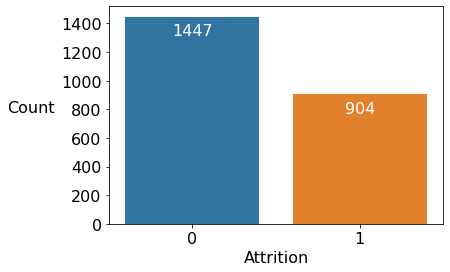

In [38]:
#Set the figure size.
plt.figure(figsize=(6,4))

# We will use a countplot here from the seaborn library.
fig = sns.countplot(df2.Attrition)

# Configure the axes labels.
fig.set_xlabel('Attrition', fontsize=16)
plt.xticks(fontsize=16)
fig.set_ylabel('Count', fontsize=16, rotation=0)
fig.yaxis.labelpad = 30
plt.yticks(fontsize=16)

# Add annotations on the plot to show the actual count values on each of the columns.
for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:}'.format(p.get_height()), (x.mean(), y-150), ha='center', va='bottom', fontsize=16, color='white')
plt.show()

Show the percentage breakdown of the target column. This also shows us the Baseline accuracy for our models. (61.5%)

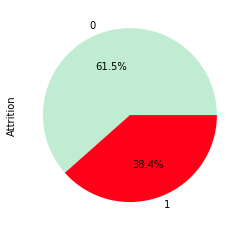

In [39]:
colors = ["#C0EDD2","#FF0018"]
round(df2["Attrition"].value_counts()/df2.shape[0]*100,2).plot.pie(colors=colors, autopct= '%2.1f%%')

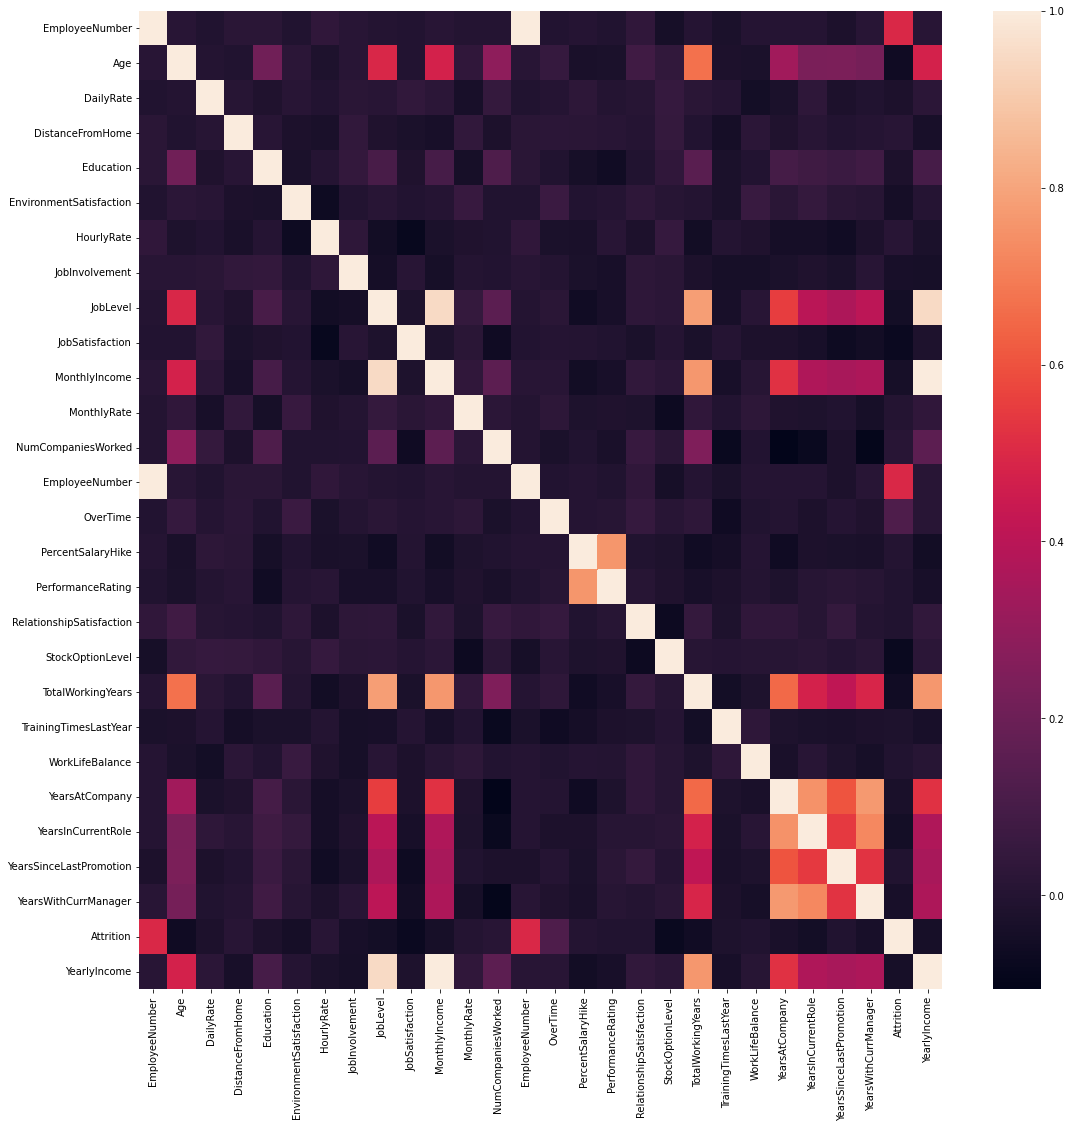

In [40]:
plt.subplots(figsize = (18, 18))
sns.heatmap(concat.corr(), annot = False)

##### Plot the distribution of Age

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


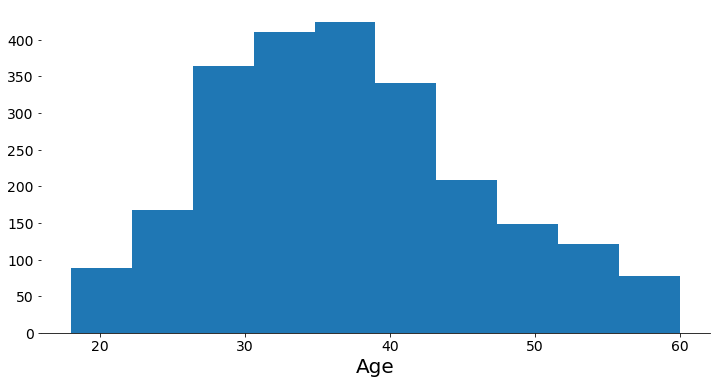

In [41]:
plt.figure(figsize=(12,6))
fig = sns.distplot(df1.Age, kde=False, bins=10, hist_kws=dict(alpha=1))
sns.despine(left=True)
fig.set_xlabel('Age', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.yaxis.labelpad = 35
plt.show()

In [42]:
# This graph shows a normal distribution with a slightly positive skew as indicated by the longer tail going off toward 
# the right hand side.

# Lets look into the Age feature in more detail in relation to the target variable.

##### Relation between age decades and attrition

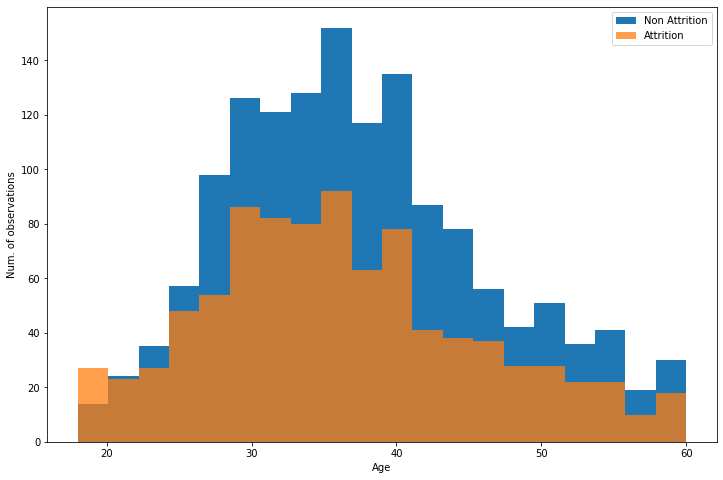

In [43]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(concat[concat["Attrition"] == 0]["Age"], label="Non Attrition", 
        bins=20)
ax.hist(concat[concat["Attrition"] == 1]["Age"], label="Attrition",
        bins=20, histtype="stepfilled", alpha = 0.75)
ax.set_xlabel("Age")
ax.set_ylabel("Num. of observations")
ax.legend()
plt.show()

In [44]:
# From this graph, we can see that attrition is present across all the age ranges.

# However, for some age groups, attrition is much more prevalent. 
# This is especially true in the early 20s age group where it is almost equal.

# Attrition seems to be at its lowest in the mid 40s, and steadily increases as it gets closer the retirement age.

##### How many females and males does the company have?

Males are more than females in this company. Males are 61.3% and females are 48.7%.

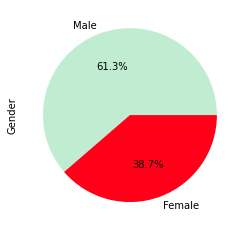

In [45]:
colors = ["#C0EDD2","#FF0018"]
round(df1["Gender"].value_counts()/df1.shape[0]*100,2).plot.pie(colors=colors, autopct= '%2.1f%%')

**How gender is related to the attrition ? Clarify by plotting.**

**The visualization clarify that males are more likely to leave company than females.**

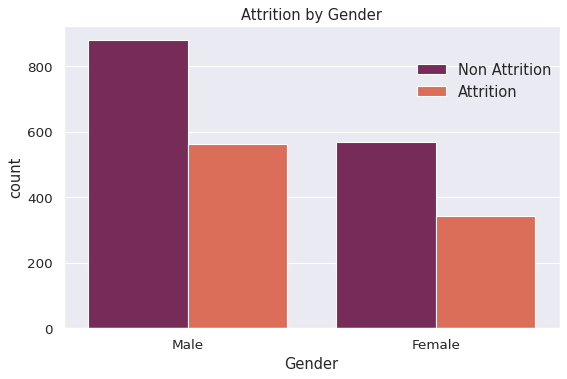

In [46]:
plt.figure(figsize=(8,5), dpi=80)
sns.set_theme(style="darkgrid", font_scale = 1.1)
sns.countplot(data=concat, x='Gender', hue='Attrition', palette='rocket').set_title('Attrition by Gender');
plt.legend(labels =['Non Attrition','Attrition'],fontsize='medium', bbox_to_anchor=(0.7, 0.9), loc=2, borderaxespad=0., frameon=0)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


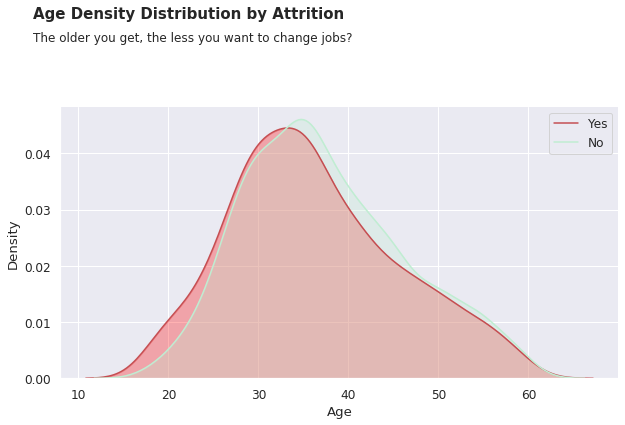

In [47]:
# age
plt.figure(figsize=(10,5))
ax = sns.distplot(attrition_yes["Age"],hist=False,label="Yes",color="r")
ax = sns.distplot(attrition_no["Age"],hist=False,label="No",color="#C0EDD2")

plt.ylabel("Density")
plt.legend()
# Get the two lines from the axes to generate shading
l1 = ax.lines[0]
l2 = ax.lines[1]

# Get the xy data from the lines so that we can shade
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
x2 = l2.get_xydata()[:,0]
y2 = l2.get_xydata()[:,1]
ax.fill_between(x1,y1, color="red", alpha=0.3)
ax.fill_between(x2,y2, color="#C0EDD2", alpha=0.3)
sns.despine()
ax.text(5,0.064,"Age Density Distribution by Attrition",
        fontsize=15,        
         fontweight='bold') 
ax.text(5,0.06,"The older you get, the less you want to change jobs?",
        fontsize=12) 
plt.show(block=False)

**Gender does not influence much, but being single and working a lot of overtime are important factors to take into account. Employees who are single are most likely to leave than married or divorced ones.**

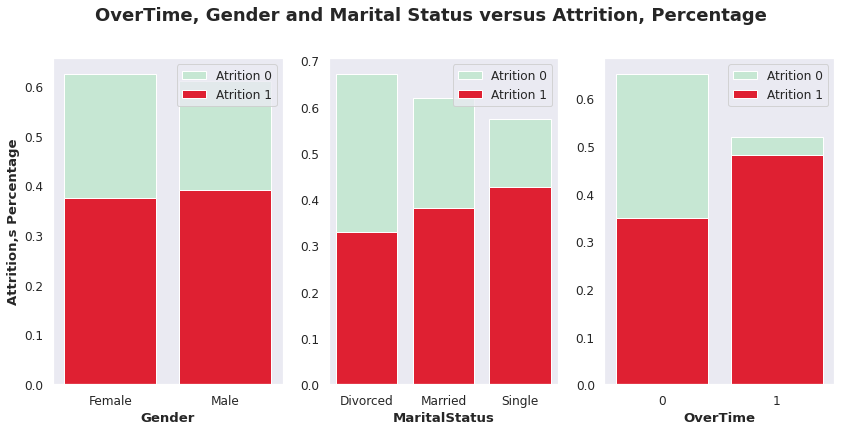

In [48]:
# marital status and gender
#colors = ["#C0EDD2","#FF0018"]
plt.figure(figsize=(14,6))
plt.suptitle('OverTime, Gender and Marital Status versus Attrition, Percentage', fontweight="bold", fontsize=18, y=1.0)

for i,column in enumerate(["Gender","MaritalStatus","OverTime"],1):
    group =concat.groupby(column)["Attrition"].value_counts(normalize=True).to_frame().unstack()

    plt.subplot(1, 3,i)
    sns.barplot(x=group.index,y=('Attrition', 0),data=group,color="#C0EDD2",label="Atrition 0")
    sns.barplot(x=group.index,y=('Attrition', 1),data=group,color="#FF0018",label="Atrition 1")
    if i == 1:
        plt.ylabel("Attrition,s Percentage",fontweight="bold")
    else:
        plt.ylabel("",fontweight="bold")
    plt.xlabel(column,fontweight="bold")
    plt.legend()
    plt.grid(False) 
    

**Working far away from home is also important, here we see that from 10 km away it begins to be noticed in the attrition rate.**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


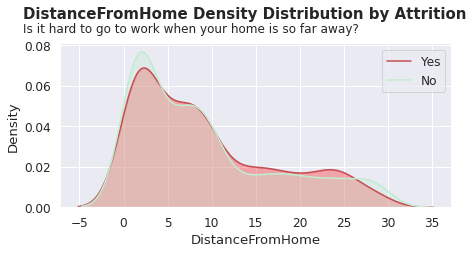

In [49]:
plt.figure(figsize=(7,3))
ax = sns.distplot(attrition_yes["DistanceFromHome"],hist=False,label="Yes",color="r")
ax = sns.distplot(attrition_no["DistanceFromHome"],hist=False,label="No",color="#C0EDD2")

plt.ylabel("Density")
plt.legend()
# Get the two lines from the axes to generate shading
l1 = ax.lines[0]
l2 = ax.lines[1]

# Get the xy data from the lines so that we can shade
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
x2 = l2.get_xydata()[:,0]
y2 = l2.get_xydata()[:,1]
ax.fill_between(x1,y1, color="red", alpha=0.3)
ax.fill_between(x2,y2, color="#C0EDD2", alpha=0.3)
sns.despine()
ax.text(-11.35,0.093,"DistanceFromHome Density Distribution by Attrition",
        fontsize=15,        
         fontweight='bold') 
ax.text(-11.35,0.086,"Is it hard to go to work when your home is so far away?",
        fontsize=12)
plt.show(block=False)

### Distribution of Monthly Income

Employee who get more monthly income are more likely to stay in company.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


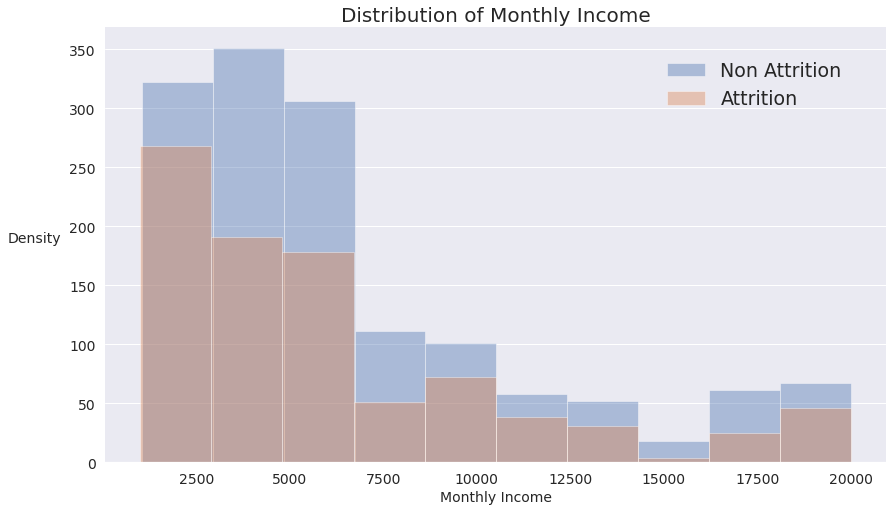

Average Monthly Income: 6541.506167588261


In [50]:
plt.figure(figsize=(14,8))
fig = sns.distplot(concat[concat['Attrition'] == 0]['MonthlyIncome'], label='Non Attrition', kde=0, bins=10)
sns.distplot(concat[concat['Attrition'] == 1]['MonthlyIncome'], label='Attrition', kde=0, bins=10)
sns.despine(left=1)
fig.grid(axis='x')
plt.xlabel('Monthly Income', fontsize=14)
plt.ylabel('Density', fontsize=14, rotation=0)
fig.yaxis.labelpad = 30
plt.title('Distribution of Monthly Income', fontsize=20);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.yaxis.labelpad = 35
plt.legend(fontsize='x-large', bbox_to_anchor=(0.71, 0.94), loc=2, borderaxespad=0., frameon=0)
plt.show()
print('Average Monthly Income:', concat.MonthlyIncome.mean())

Females are paid more than men.

Text(0.5, 1.0, 'Gender VS. Monthly Income')

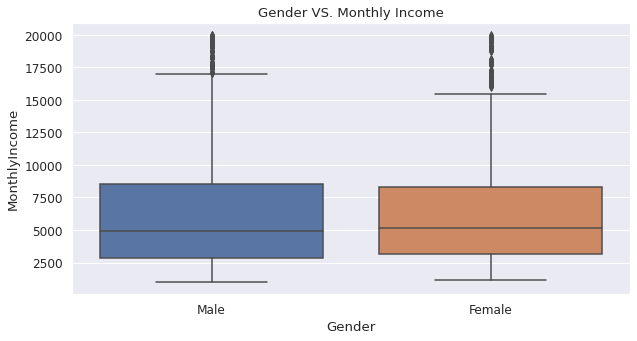

In [51]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df1["Gender"],y=df1["MonthlyIncome"])
plt.title("Gender VS. Monthly Income")

### Average Monthly Income

In [52]:
income = df1.groupby(by='JobRole').mean().MonthlyIncome
inc = pd.DataFrame(income)
inc = inc.sort_values(by='MonthlyIncome')

In [53]:
job_atr = concat[concat['Attrition'] == 1]['JobRole']
job_atr_val = job_atr.value_counts()
job_atr_df = pd.DataFrame(job_atr_val)

In [54]:
jobrole_income = concat.groupby("JobRole")["MonthlyIncome"].describe()
#obrole_income.style.background_gradient(cmap='Blues',axis=0)

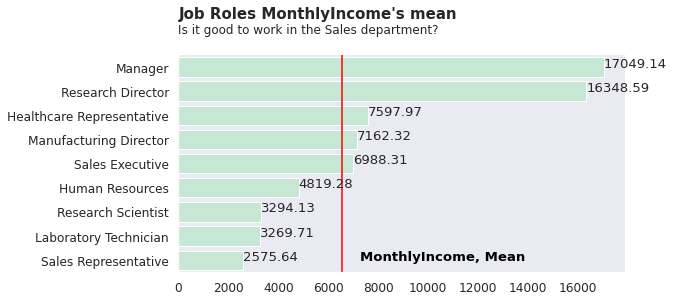

In [55]:
job_income_mean = jobrole_income["mean"].reset_index().sort_values(by="mean",ascending=False)


plt.figure(figsize=(8,4))
ax = sns.barplot(y="JobRole", x="mean", data=job_income_mean, color="#C0EDD2")
# with axvline we can draw a vertical line
ax.axvline(concat['MonthlyIncome'].mean(),color="red")

plt.ylabel("")
plt.xlabel("")
plt.grid(False)
sns.despine()

# add text anotation
ax.text(7300, 8, "MonthlyIncome, Mean", horizontalalignment='left', size='medium', color='black', weight='semibold')
for text,num in zip(round(job_income_mean["mean"],2),range(9)):
    ax.text(text,num,text)
ax.text(-0.3,-2,"Job Roles MonthlyIncome's mean",
        fontsize=15,        
         fontweight='bold') 
ax.text(-0.3,-1.4,"Is it good to work in the Sales department?",
        fontsize=12) 
plt.show(block=False)

### Influence of Education level

##### Monthly income per Education level

In [56]:
edu_sal = df1.groupby('Education').mean().MonthlyIncome
edu_sal_df=pd.DataFrame(edu_sal)
edu_sal_df = edu_sal_df.sort_values('MonthlyIncome', ascending=False)

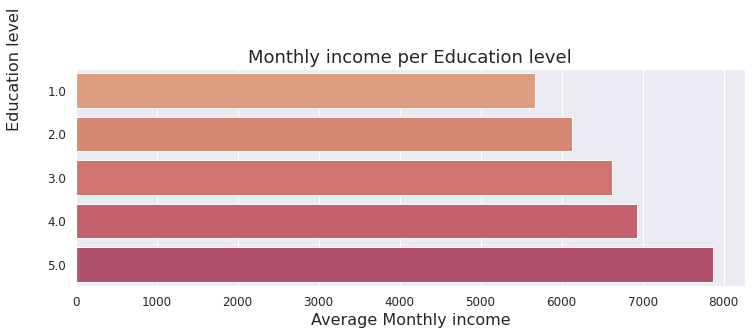

In [57]:
plt.figure(figsize=(12,4))
fig = sns.barplot(y=edu_sal_df.index, x='MonthlyIncome', data=edu_sal_df, 
                  palette=sns.color_palette("flare", n_colors=len(job_atr_df.index)), orient = 'h')
fig.set_title('Monthly income per Education level',fontsize=18)
fig.set_xlabel('Average Monthly income', fontsize=16)
fig.set_ylabel('Education level', fontsize=16, position=(0,1), rotation=90)
fig.yaxis.labelpad= 25
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)

plt.show()

In [58]:
concat['Education'] = concat['Education'].replace([1, 2, 3, 4, 5], ['Below College','College', 'Bachelor', 'Master', 'Doctor'])

People who got only bachelor degree are most likely yo leave.

Text(0.5, 1.0, 'Attrition by education')

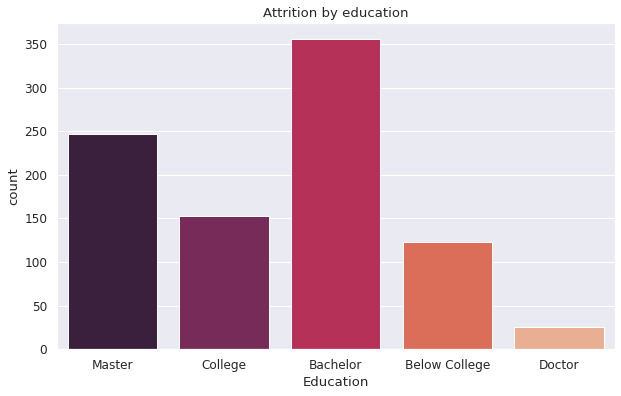

In [59]:
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid", font_scale = 1.1)
sns.countplot(data=concat[(concat['Attrition'] == 1)], x='Education', palette='rocket').set_title('Attrition by education')

### Is there a relation between employees who left and their department? Let's find out the department that contain the highest rate of attrition.

People working in sales, human resources and research are the most likely to leave the company than any other departments. People who work in management positions are more likely to remain in the company. 

In [60]:
# groupby by jobrole (to_frame and unstack it's not necessary, I did it this way because I was playing with dataframe and colors.)
by_jobRole =concat.groupby("JobRole")["Attrition"].value_counts(normalize=True).to_frame().unstack()

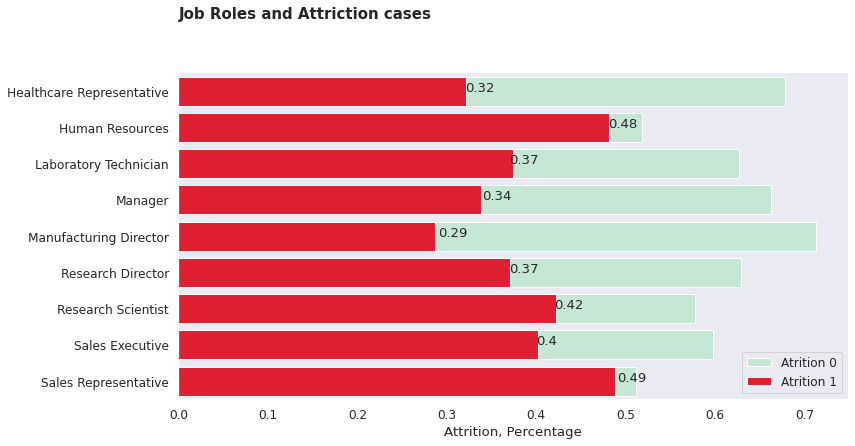

In [61]:
#plot
plt.figure(figsize=(12,6))
ax=sns.barplot(y=by_jobRole.index,x=('Attrition', 0),data=by_jobRole,color="#C0EDD2",label="Atrition 0")
sns.barplot(y=by_jobRole.index,x=('Attrition', 1),data=by_jobRole,color="#FF0018",label="Atrition 1")


plt.ylabel("")
plt.xlabel("Attrition, Percentage")
plt.grid(False)
sns.despine()
plt.legend()
ax.text(0,-2,"Job Roles and Attriction cases",
        fontsize=15,        
         fontweight='bold') 
# with a loop I add the values to the graphic
for num, text in zip(range(9),round(by_jobRole['Attrition', 1],2)):
    ax.text(text, num, text)
plt.show(block=False)

### Business Travel

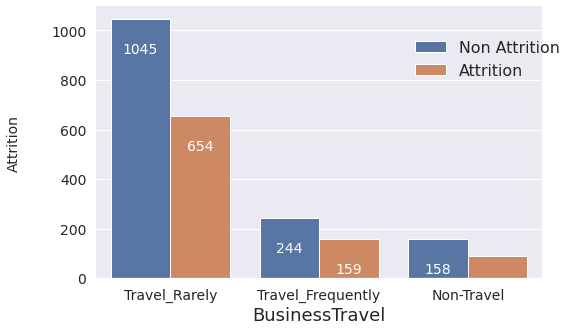

In [62]:
plt.figure(figsize=(8,5))
fig = sns.countplot(x='BusinessTravel', hue='Attrition', data=concat)
sns.despine(left=True)
fig.set_xlabel('BusinessTravel', fontsize=18)
plt.xticks(fontsize=14)
fig.set_ylabel('Attrition', fontsize=14, rotation=90)
fig.yaxis.labelpad = 30
plt.yticks(fontsize=14)
for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:}'.format(p.get_height()), (x.mean(), y-150), ha='center', va='bottom', fontsize=14, color='white')
plt.legend(labels =['Non Attrition','Attrition'],fontsize='large', bbox_to_anchor=(0.7, 0.9), loc=2, borderaxespad=0., frameon=0)
plt.show()

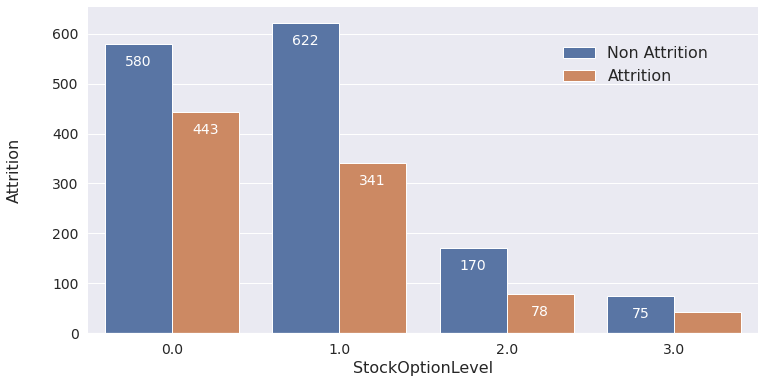

In [63]:
plt.figure(figsize=(12,6))
fig = sns.countplot(x='StockOptionLevel', hue='Attrition', data=concat)
sns.despine(left=True)
fig.set_xlabel('StockOptionLevel', fontsize=16)
plt.xticks(fontsize=14)
fig.set_ylabel('Attrition', fontsize=16, rotation=90)
fig.yaxis.labelpad = 30
plt.yticks(fontsize=14)
for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:}'.format(p.get_height()), (x.mean(), y-50), ha='center', va='bottom', fontsize=14, color='white')
plt.legend(labels =['Non Attrition','Attrition'],fontsize='large', bbox_to_anchor=(0.7, 0.9), loc=2, borderaxespad=0., frameon=0)
plt.show()

### Would working for same manager for several years affect the monthly income?

Being with the same manager for several years increase monthly income

Text(0.5, 1.0, 'YearsWithCurrManager VS. Monthly Income')

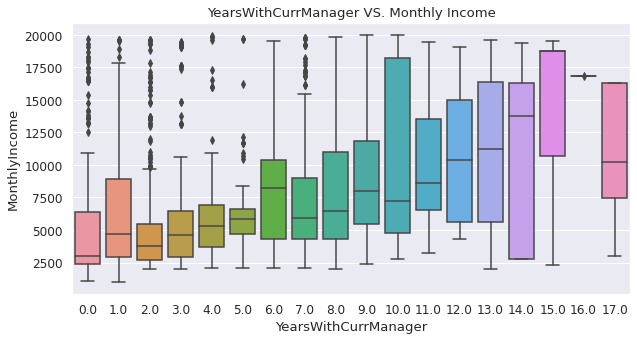

In [64]:
plt.figure(figsize=(10,5))
sns.boxplot(x=concat["YearsWithCurrManager"],y=concat["MonthlyIncome"])
plt.title("YearsWithCurrManager VS. Monthly Income")

### Comparing satisfaction for both who left and still employeed

In [65]:
#employees who left the company
employee_left = concat.loc[concat['Attrition'] == 1]
employee_left.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
5,1467,34.0,Travel_Rarely,1107.0,Human Resources,9.0,Master,Technical Degree,1.0,Female,...,0.0,2.0,0.0,3.0,2.0,2.0,2.0,2.0,1,32904.0
8,555,34.0,Travel_Frequently,296.0,Sales,6.0,College,Marketing,4.0,Female,...,1.0,3.0,3.0,2.0,2.0,2.0,1.0,0.0,1,28212.0
12,42,39.0,Travel_Rarely,895.0,Sales,5.0,Bachelor,Technical Degree,4.0,Male,...,1.0,19.0,6.0,4.0,1.0,0.0,0.0,0.0,1,25032.0
15,1624,18.0,Travel_Frequently,544.0,Sales,3.0,College,Medical,2.0,Female,...,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,1,18828.0
18,514,30.0,Travel_Frequently,464.0,Research & Development,4.0,Bachelor,Technical Degree,3.0,Male,...,0.0,3.0,4.0,3.0,1.0,0.0,0.0,0.0,1,27420.0


In [66]:
#satisfaction for those who left
dfsatisfactionY = employee_left[['JobSatisfaction', 'RelationshipSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance']]
dfsatisfactionY.describe()

,JobSatisfaction,RelationshipSatisfaction,EnvironmentSatisfaction,WorkLifeBalance
count,904.000000,904.000000,904.000000,904.000000
mean,2.617257,2.748894,2.654867,2.769912
std,1.100473,1.102699,1.083613,0.730707
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,3.000000
max,4.000000,4.000000,4.000000,4.000000


In [67]:
#currently employed
still_employeed =concat.loc[concat['Attrition'] == 0]
still_employeed.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,Below College,Life Sciences,4.0,Male,...,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,0,61512.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,College,Medical,4.0,Female,...,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,0,93072.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,Bachelor,Other,3.0,Female,...,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,0,28416.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,College,Life Sciences,4.0,Female,...,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,0,39720.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,College,Other,3.0,Male,...,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0,23412.0


In [68]:
dfsatisfactionN = still_employeed[['JobSatisfaction', 'RelationshipSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance' ]]
dfsatisfactionN.describe()

,JobSatisfaction,RelationshipSatisfaction,EnvironmentSatisfaction,WorkLifeBalance
count,1447.000000,1447.000000,1447.000000,1447.000000
mean,2.784381,2.766413,2.749827,2.781617
std,1.083233,1.061409,1.082182,0.693275
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,3.000000
max,4.000000,4.000000,4.000000,4.000000


In [69]:
employee_left['JobSatisfaction'].value_counts()

3.0    260
4.0    246
2.0    204
1.0    194
Name: JobSatisfaction, dtype: int64

In [70]:
still_employeed['JobSatisfaction'].value_counts()

4.0    478
3.0    427
2.0    294
1.0    248
Name: JobSatisfaction, dtype: int64

AttributeError: ignored

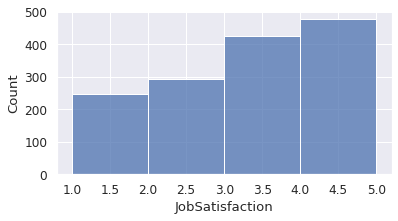

In [71]:
#still employed

for col in dfsatisfactionN.columns:
    fig, ax = plt.subplots(figsize=(6,3))
    sns.set_theme(style="darkgrid", font_scale = 0.75)
    ax = sns.histplot(data = dfsatisfactionN, x = col, binwidth = 1, binrange = (1,5),legend = True, palette = 'rocket')
    for i in ax.containers:
        ax.bar_label(i,)

AttributeError: ignored

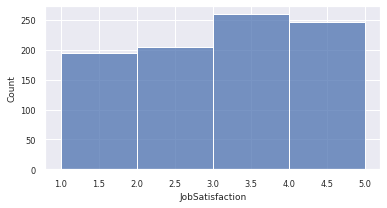

In [72]:
#left employees
for col in dfsatisfactionY.columns:
    plt.figure(figsize=(6,3))
    sns.set_theme(style="darkgrid", font_scale = 0.75)
    ax = sns.histplot(data = dfsatisfactionY, x = col, binwidth = 1, binrange = (1,5),legend = True, palette = 'rocket')
    for i in ax.containers:
        ax.bar_label(i,)

### Data Visualization Summary

##### Attrition & Age

Attrition seems to be more prevalent in the early career stages, most notebly between the ages of 20 and 30. 
Whilst there is records of attrition at almost every age grouping, it would be beneficial to retain these younger employees
and develop them within the business

##### Attrition & monthly income

While it isn't groundbreaking that the employees getting paid more are less likely to quit their jobs, exploring this area 
did uncover certain job roles where despite their pay level, attrition was abnormally higher than other roles. 
This relationship between income and retention could also be worth exploring in relation to preventing attrition, 
by offering incentives in the form of pay increases, how much of an effect, if any, would this have on the employees 
attrition chance.

### What type of measures should the company take in order to retain their employees?

Woman are getting more salary than men so they are more likely to leave the company so we should increase men’s salary to decrease attrition. Also the company should care more about employees’ satisfactory.